# Market Segmentation

In [1]:
import csv
import numpy
from matplotlib import pyplot
from sklearn.cluster import MeanShift, estimate_bandwidth

## Loading Data

In [6]:
with open("sales.csv", 'r') as file:
    reader = csv.reader(file, delimiter=',')
    
    rows = []
    for i, row in enumerate(reader):
        if not i:
            names = row[1:]
            continue
        
        rows.append([float(x) for x in row[1:]])

    data = numpy.array(rows)


In [18]:
bandwidth = estimate_bandwidth(data, quantile=0.8, n_samples=len(data))

meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift.fit(data)

labels = meanshift.labels_
centers = meanshift.cluster_centers_
num_clusters = len(numpy.unique(labels))
centers_2d = centers[:, 1:3]

print("Centers of {0} clusters:".format(num_clusters))
print('\t'.join(name[:3] for name in names))
for center in centers:
    print('\t'.join(str(int(x)) for x in center))

Centers of 9 clusters:
Tsh	Tan	Hal	Tur	Tub	Swe
9823	4637	6539	2607	2228	1239
38589	44199	56158	5030	24674	4125
28333	34263	24065	5575	4229	18076
14987	46397	97393	1127	37315	3235
22617	77873	32543	1005	21035	837
104972	29186	19415	16016	5060	9372
38741	40539	20120	35059	255	50710
35314	16745	12775	66900	1298	5613
7852	4939	63081	134	40066	1332


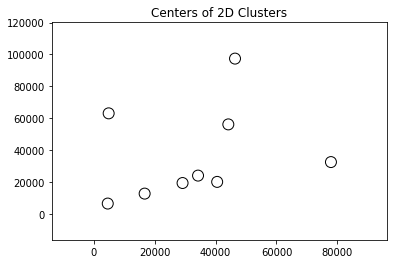

In [19]:
pyplot.figure()
pyplot.scatter(centers_2d[:, 0], centers_2d[:, 1], s=120, edgecolors='black', facecolors='none')
offset = 0.25
centers_2dx, centers_2dy = centers_2d[:, 0], centers_2d[:, 1]
pyplot.xlim(centers_2dx.min() - offset * centers_2dx.ptp(), centers_2dx.max() + offset * centers_2dx.ptp())
pyplot.ylim(centers_2dy.min() - offset * centers_2dy.ptp(), centers_2dy.max() + offset * centers_2dy.ptp())
pyplot.title("Centers of 2D Clusters")
pyplot.show()